<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/cnt_logo_700.png" width=250 height=250></th>
    <th style="background-color:white"> <img src="../media/CCAL.png" width=210 height=210></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=170 height=170></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
  </tr>
</table>

# GSEA Notebook v1

<hr style="border: none; border-bottom: 3px solid #88BBEE;">

## Configure notebook

In [1]:
%load_ext autoreload
%autoreload 2

import numpy 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import plotly as py
import pandas as pd
import numpy as np
np.random.seed(7678)

import sys
sys.path.insert(0, '../tools/')
import ccal 
# import ccalnoir as ccal
        
import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))    

CCAL version 0.9.4 @ /home/clarenceiyan/scratch/GSEA_Examples/tools/ccal/__init__.py


### Read MYC dataset

In [2]:
myc_ds = pd.read_csv('../data/myc_collapsed.csv', index_col = 0)
print(myc_ds.shape)
myc_ds = myc_ds.groupby(myc_ds.index, axis=0).max() # collapse multiple gene entries with their maximum value
myc_ds.fillna(value=0, inplace=True)   # Replace NA's with 0's
print(myc_ds.shape)

(20046, 20)
(20046, 20)


### Define phenotype

In [3]:
myc_phenotype = pd.DataFrame(0, index = ['Myc Phenotype'], columns = myc_ds.columns)
myc_phenotype.loc['Myc Phenotype',:] = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
myc_phenotype

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10
Myc Phenotype,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1


### Perform Differential Gene Expression (DGE) Analysis

In [4]:
DGE_scores = ccal.make_match_panel(
    target = myc_phenotype.loc['Myc Phenotype',:],
    target_type = 'binary',
    target_ascending = False,
    data = myc_ds,
    data_type = 'continuous',
    n_extreme = 50,
    n_permutation = 1,
    n_sampling = 50,
    plot_std = 3,
    score_ascending = False,
    title = ' ',
    layout_width = 1000, 
    row_height = 50, 
    layout_side_margin = 200, 
    annotation_font_size = 10,
    file_path_prefix = '../results/myc_phen_vs_genes.html')

target.index (20) & data.columns (20) have 20 in common.
Computing score using compute_information_coefficient with 1 process ...
Computing MoE with 50 sampling ...
Computing p-value and FDR with 1 permutation ...
Clustering heat map within category ...
../results/myc_phen_vs_genes.html.html


### Extract gene score and select top/bottom 50 scores subset

In [5]:
gene_score = DGE_scores.loc[:, 'Score']
N = len(gene_score)
subset = list(range(0, 50)) + list(range(N - 50, N))
gene_score_subset = gene_score[subset]
gene_score_subset

Gene
CCDC86       0.865940
HSPA6        0.865930
IPO4         0.865900
GEMIN5       0.865886
LOC201164    0.865881
               ...   
FGF11       -0.865427
ARNTL       -0.865539
MST1R       -0.865919
ZNF236      -0.865994
SMTN        -0.866024
Name: Score, Length: 100, dtype: float64

### Read Hallmarks (Hallmark gene sets collection from MSigDB.org)

In [6]:
gmt1 = '../data/h.all.v7.0.symbols.gmt'
gene_sets = ccal.read_gmts([gmt1], collapse=False)
gene_sets

,Gene 0,Gene 1,Gene 10,Gene 100,Gene 101,Gene 102,Gene 103,Gene 104,Gene 105,Gene 106,...,Gene 90,Gene 91,Gene 92,Gene 93,Gene 94,Gene 95,Gene 96,Gene 97,Gene 98,Gene 99
Gene Set,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,TNFRSF9,ACKR3,CD44,CD69,ID2,IL6,PLPP3,ATP2B1,IL7R,IFNGR2,...,CCNL1,KDM6B,SAT1,CD83,DENND5A,MYC,IRS2,MAFF,KLF4,PPP1R15A
HALLMARK_HYPOXIA,NDST1,ACKR3,RBPJ,HOXB9,EXT1,MAFF,CCNG2,GALK1,VLDLR,PPP1R15A,...,ADM,PRKCA,PKLR,STC1,IGFBP3,DTNA,NCAN,CHST2,ALDOB,IRS2
HALLMARK_CHOLESTEROL_HOMEOSTASIS,TM7SF2,FABP5,GNAI1,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
HALLMARK_MITOTIC_SPINDLE,KIF5B,KIF22,CNTROB,CDC42BPA,CENPE,MARK4,FBXO5,PALLD,TUBD1,SSH2,...,TUBA4A,CEP57,TTK,GSN,PXN,CEP131,RAPGEF5,ARHGAP29,ARHGEF2,FGD6
HALLMARK_WNT_BETA_CATENIN_SIGNALING,NKD1,NOTCH4,JAG2,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
HALLMARK_TGF_BETA_SIGNALING,ENG,IFNGR2,FNTA,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
HALLMARK_IL6_JAK_STAT3_SIGNALING,ITGA4,PTPN2,CSF2RB,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
HALLMARK_DNA_REPAIR,PNP,DGCR8,ITPA,POLR3C,USP11,RAE1,TAF10,ELL,NT5C,SAC3D1,...,POLR2J,PRIM1,DAD1,DDB2,SDCBP,SUPT4H1,REV3L,POLR1D,ELOA,MPG
HALLMARK_G2M_CHECKPOINT,MCM6,KIF22,CCNT1,HOXC10,CDC7,UPF1,CENPE,EFNA5,RPA2,SRSF2,...,AC091021.1,HIF1A,E2F1,CHMP1A,ORC5,RBM14,TROAP,TTK,MCM2,MYC


### Perform GSEA analysis for one of the hallmark gene sets: HALLMARK_MYC_TARGETS_V2 using the 100 genes gene-list

In [7]:
gene_set = 'HALLMARK_MYC_TARGETS_V2'
ccal.core_GSEA(
            gene_score = gene_score_subset,
            plot = True,
            title = gene_set,
            plot_gene_names = True,
            annotation_text_font_size=14,
            gene_set_genes = gene_sets.loc[gene_set, :],
            sample_norm_type = None)

0.64

### Repeat the analysis but using the entire gene list

In [8]:
gene_set = 'HALLMARK_MYC_TARGETS_V2'
ccal.core_GSEA(
            gene_score = gene_score,
            plot = True,
            title = gene_set,
            plot_gene_names = False,
            annotation_text_font_size=14,
            gene_set_genes = gene_sets.loc[gene_set, :],
            sample_norm_type = None)

0.819

### Now perform the GSEA analysis using all the hallmarks

In [9]:
gene_set_scores = pd.Series(0, index=gene_sets.index, name='scores')

for gene_set in gene_sets.index:
    
    gene_set_scores.loc[gene_set] = ccal.core_GSEA(
                                gene_score = gene_score,
                                plot = False,
                                title = gene_set,
                                statistic = 'ks',
                                plot_gene_names = False,
                                annotation_text_font_size=14,
                                gene_set_genes = gene_sets.loc[gene_set, :],
                                sample_norm_type = None)

gene_set_scores.sort_values(ascending=False)      

Gene Set
HALLMARK_MYC_TARGETS_V2                       0.819
HALLMARK_MYC_TARGETS_V1                       0.604
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            0.406
HALLMARK_OXIDATIVE_PHOSPHORYLATION            0.401
HALLMARK_DNA_REPAIR                           0.358
HALLMARK_MTORC1_SIGNALING                     0.264
HALLMARK_UV_RESPONSE_UP                       0.263
HALLMARK_ADIPOGENESIS                         0.255
HALLMARK_E2F_TARGETS                          0.237
HALLMARK_GLYCOLYSIS                           0.209
HALLMARK_PANCREAS_BETA_CELLS                  0.125
HALLMARK_SPERMATOGENESIS                     -0.113
HALLMARK_FATTY_ACID_METABOLISM               -0.134
HALLMARK_PEROXISOME                          -0.181
HALLMARK_WNT_BETA_CATENIN_SIGNALING          -0.197
HALLMARK_KRAS_SIGNALING_DN                   -0.216
HALLMARK_XENOBIOTIC_METABOLISM               -0.217
HALLMARK_ALLOGRAFT_REJECTION                 -0.233
HALLMARK_BILE_ACID_METABOLISM                -0.241
HAL

### Run single-sample GSEA for the original gene expression dataset (no DGE)

In [10]:
import ccal

pathway_exp = ccal.ssGSEA(
    myc_ds, 
    gene_sets, 
    statistic="auc", 
    alpha = 1,
    file_path=None,
    sample_norm_type='zscore'
)

Running single-sample GSEA with 50 gene sets ...


### Perform Differential Pathway Expression (DPE) Analysis

In [11]:
DPE_scores = ccal.make_match_panel(
    target = myc_phenotype.loc['Myc Phenotype',:],
    target_type = 'binary',
    target_ascending = False,
    data = pathway_exp,
    data_type = 'continuous',
    n_extreme = 50,
    n_permutation = 1,
    n_sampling = 50,
    plot_std = 3,
    score_ascending = False,
    title = ' ',
    layout_width = 1080, 
    row_height = 50, 
    layout_side_margin = 250, 
    annotation_font_size = 10,
    file_path_prefix = '../results/myc_phen_vs_pathways.html')

target.index (20) & data.columns (20) have 20 in common.
Computing score using compute_information_coefficient with 1 process ...
Computing MoE with 50 sampling ...
Computing p-value and FDR with 1 permutation ...
Clustering heat map within category ...
../results/myc_phen_vs_pathways.html.html


### Extract DPE scores

In [12]:
gene_set_scores2 = DPE_scores.loc[:, 'Score']
gene_set_scores2

Gene Set
HALLMARK_MYC_TARGETS_V2                       0.865953
HALLMARK_MYC_TARGETS_V1                       0.803948
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            0.721807
HALLMARK_WNT_BETA_CATENIN_SIGNALING           0.692702
HALLMARK_ADIPOGENESIS                         0.578746
HALLMARK_OXIDATIVE_PHOSPHORYLATION            0.566369
HALLMARK_DNA_REPAIR                           0.533445
HALLMARK_E2F_TARGETS                          0.405677
HALLMARK_PANCREAS_BETA_CELLS                  0.326897
HALLMARK_MTORC1_SIGNALING                     0.308254
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY      0.273162
HALLMARK_UV_RESPONSE_UP                       0.239060
HALLMARK_SPERMATOGENESIS                      0.191836
HALLMARK_FATTY_ACID_METABOLISM                0.187520
HALLMARK_PEROXISOME                          -0.114022
HALLMARK_GLYCOLYSIS                          -0.217205
HALLMARK_G2M_CHECKPOINT                      -0.223803
HALLMARK_HEDGEHOG_SIGNALING                  -0.327166
H

### Compare this results (DPE) with the first analysis using DGE

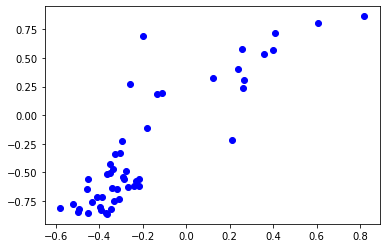

In [13]:
plt.plot(gene_set_scores, gene_set_scores2[gene_set_scores.index], 'bo')